In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(df.shape)

(303, 14)


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print("Unique values in 'sex' column:", df['sex'].unique())  # Unique values in 'sex' column
print("Number of unique values in 'cp' column:", df['cp'].nunique())  # Number of unique values in 'cp' column
print(df['fbs'].value_counts())  # Value counts in 'fbs' column


Unique values in 'sex' column: [1 0]
Number of unique values in 'cp' column: 4
0    258
1     45
Name: fbs, dtype: int64


In [8]:
correlation = df.corr()  # Compute the correlation matrix
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


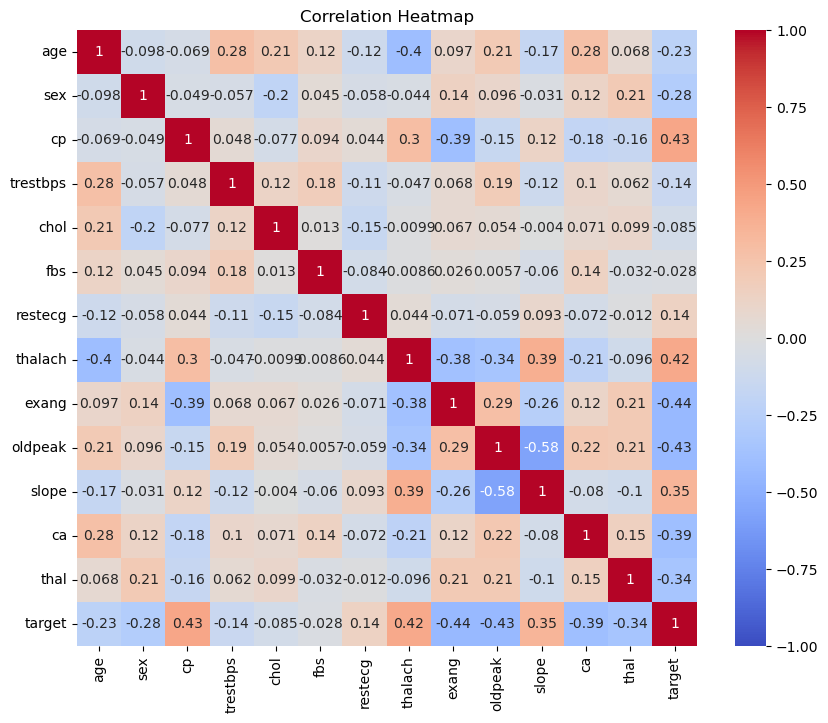

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

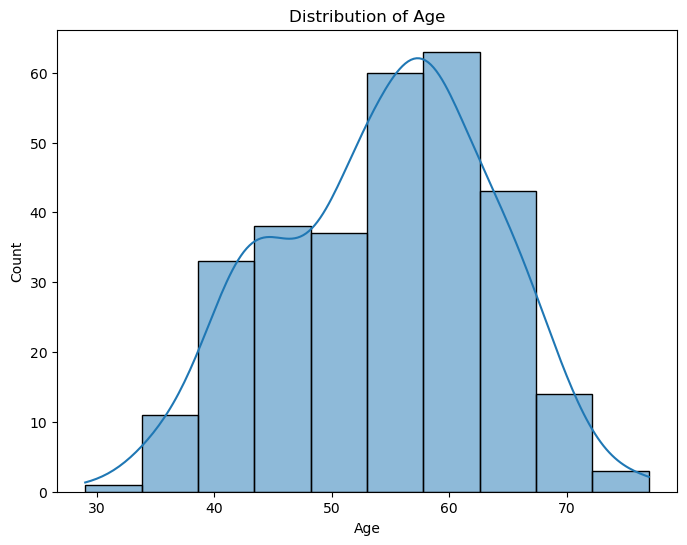

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

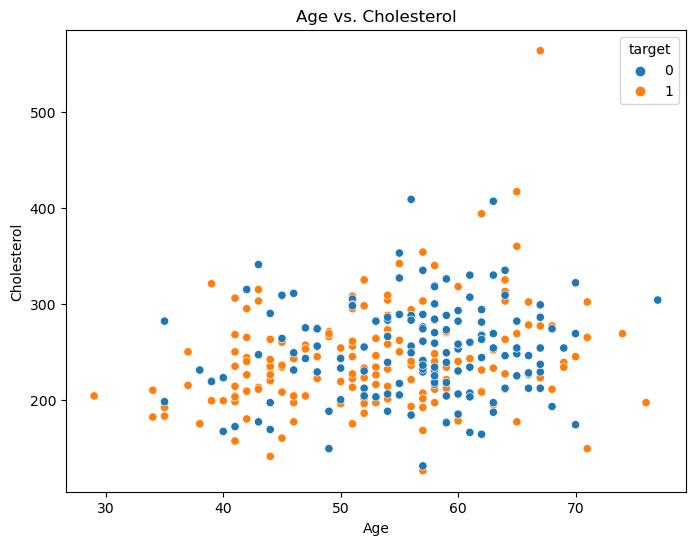

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.title("Age vs. Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

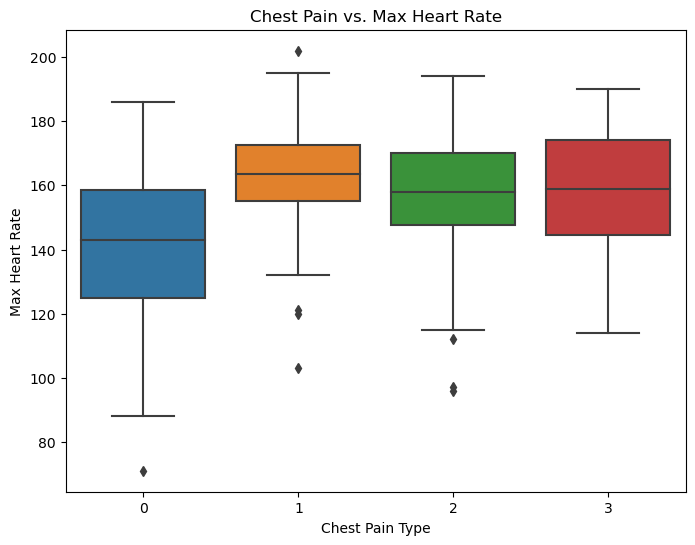

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cp', y='thalach')
plt.title("Chest Pain vs. Max Heart Rate")
plt.xlabel("Chest Pain Type")
plt.ylabel("Max Heart Rate")
plt.show()

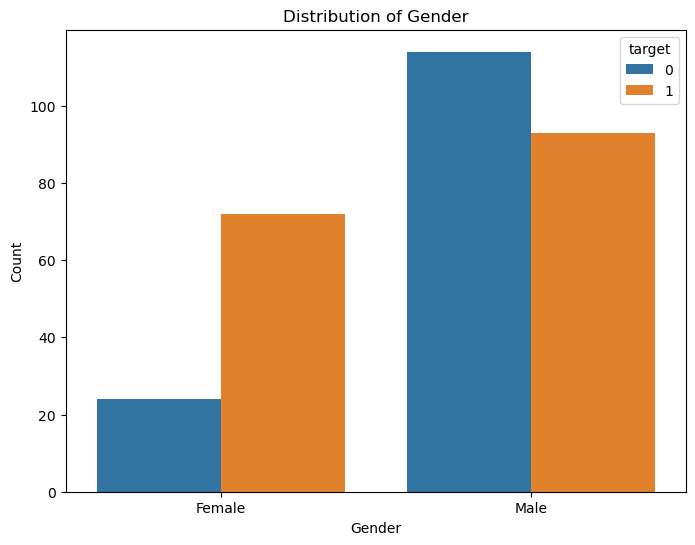

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='target')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

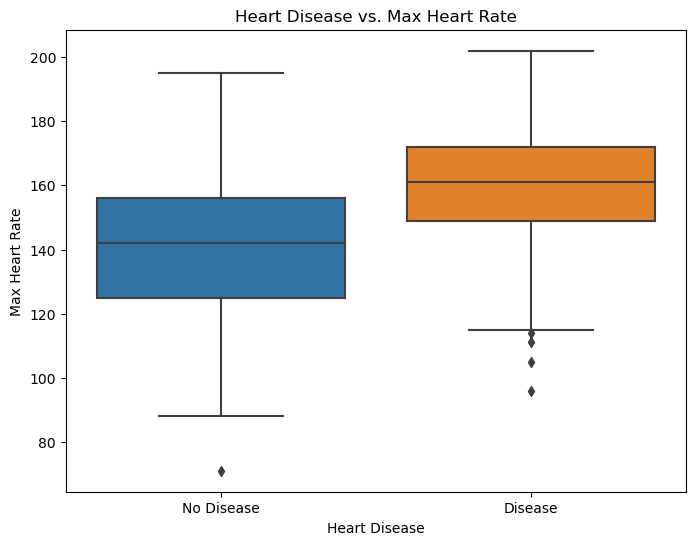

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='thalach')
plt.title("Heart Disease vs. Max Heart Rate")
plt.xlabel("Heart Disease")
plt.ylabel("Max Heart Rate")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

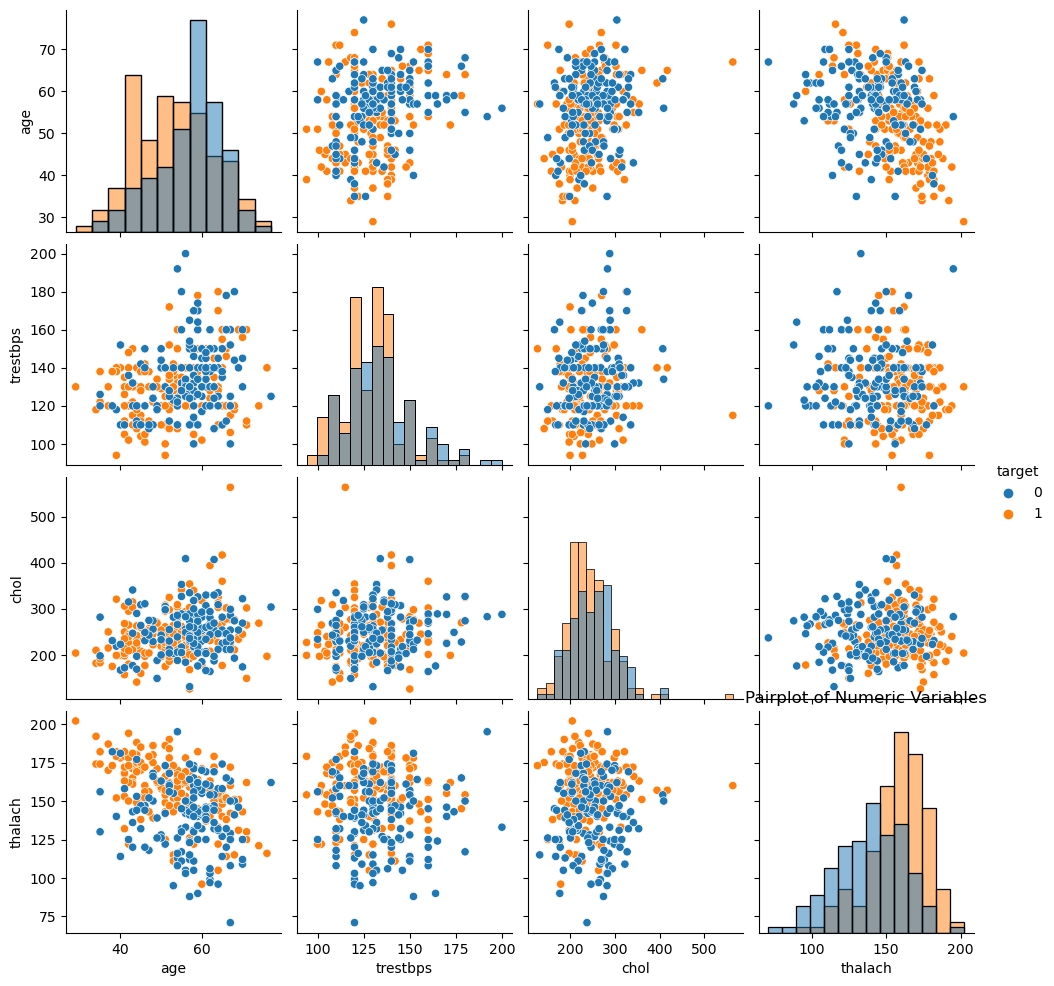

In [15]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='hist')
plt.title("Pairplot of Numeric Variables")
plt.show()

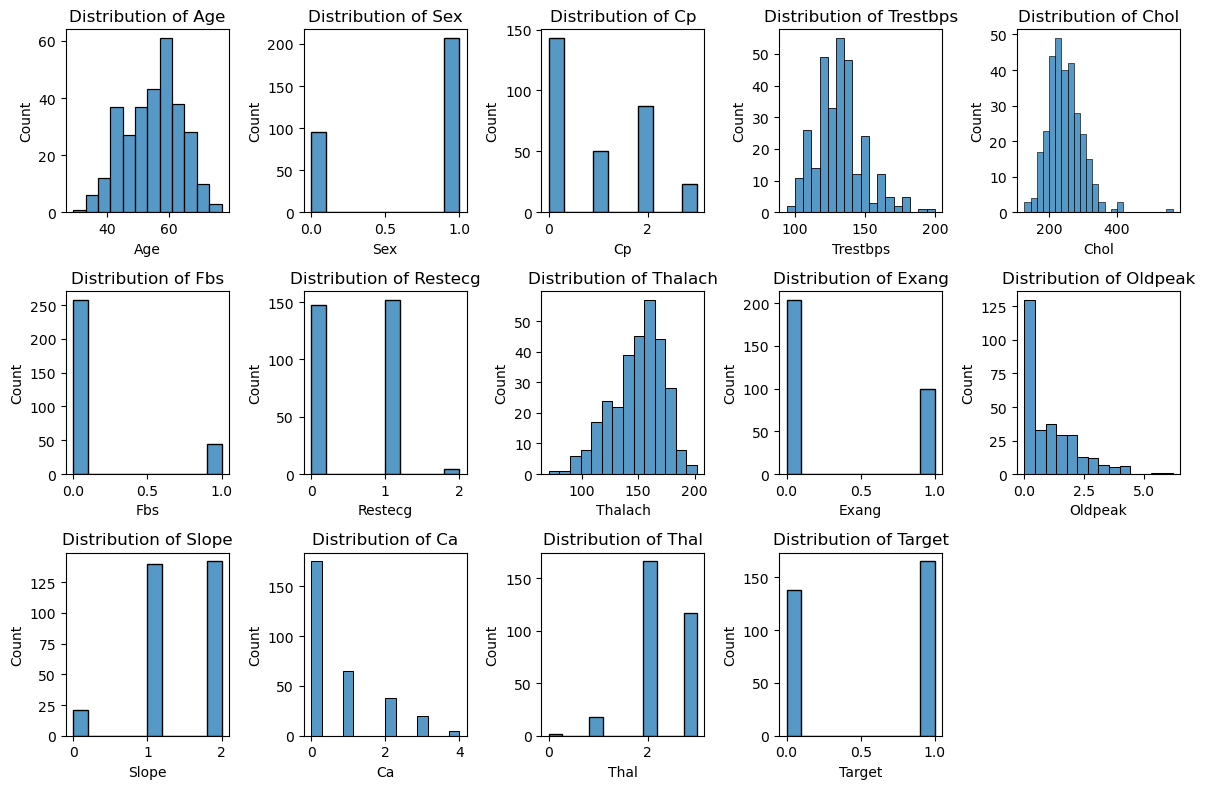

In [16]:
plt.figure(figsize=(12, 8))

# Loop through columns for visualization
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

for i, column in enumerate(columns, start=1):
    plt.subplot(3, 5, i)
    if df[column].dtype == 'object':
        sns.countplot(df[column])
    else:
        sns.histplot(df[column])
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column.capitalize()}')

plt.tight_layout()
plt.show()

In [17]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
print(df.duplicated().sum())

1


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.rename(columns={'oldpeak': 'ST_Depression'}, inplace=True)

In [21]:
df['age_category'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-aged', 'Elderly'])


In [22]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])


In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ST_Depression,slope,ca,thal,target,age_category,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elderly,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young,30-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Middle-aged,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle-aged,50-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle-aged,50-60


In [24]:
numeric_columns = ['trestbps', 'chol', 'thalach', 'ST_Depression']  # Example list of numeric columns
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()


In [25]:
skewed_columns = ['ST_Depression']  # Example list of skewed columns
df[skewed_columns] = np.log1p(df[skewed_columns])

In [26]:
columns_to_drop = ['age','age_category']  # Example list of columns to drop
df.drop(columns=columns_to_drop, inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


C:\Users\francis mawutor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LogisticRegression
Accuracy: 0.8241758241758241


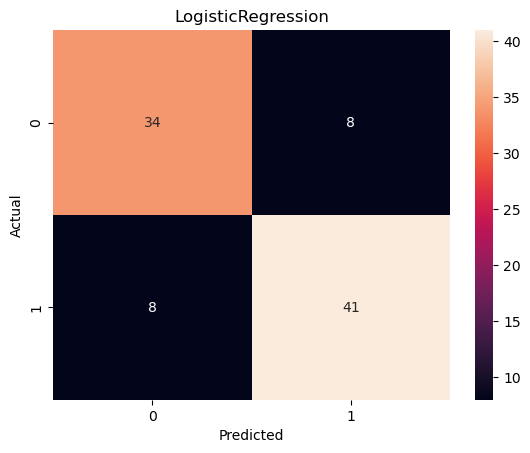

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



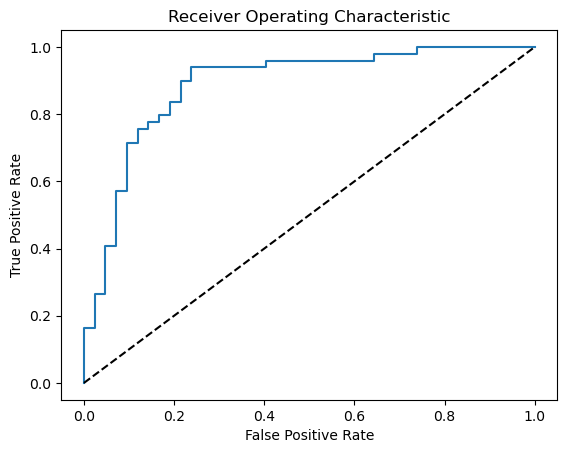

AUC Score: 0.8872691933916425
------------------------
GradientBoostingClassifier
Accuracy: 0.8351648351648352


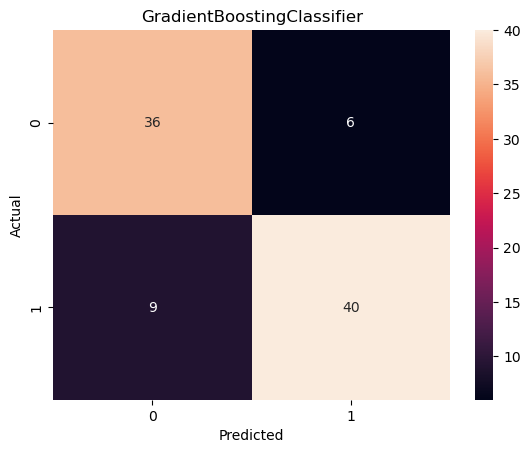

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.82      0.84        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



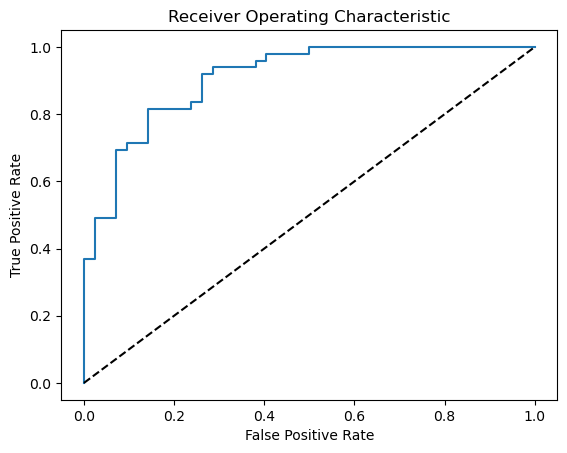

AUC Score: 0.9076773566569485
------------------------


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Assuming your data is stored in a DataFrame called 'df'
# Make sure you have performed the necessary data preprocessing steps mentioned earlier

# Drop the rows with missing values or inconsistencies
df = df.dropna().reset_index(drop=True)

# Split the data into features (X) and target variable (y)
X = df.drop(['target', 'age_group'], axis=1)
y = df['target']

# Perform one-hot encoding on the 'age_category' column
encoder = OneHotEncoder(sparse=False)
age_category_encoded = pd.DataFrame(encoder.fit_transform(df[['age_group']]))
age_category_columns = encoder.get_feature_names_out(['age_group'])
age_category_encoded.columns = age_category_columns

# Concatenate the encoded column with the features
X = pd.concat([X, age_category_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of classification models
models = [
    LogisticRegression(),
    GradientBoostingClassifier(),
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print model name and accuracy
    print(type(model).__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(type(model).__name__)
    plt.show()
    
    # Generate a classification report
    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    
    if hasattr(model, "predict_proba"):
        # Plot ROC curve
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.show()
        
        # Calculate AUC score
        auc_score = roc_auc_score(y_test, y_prob)
        print("AUC Score:", auc_score)
    
    print("------------------------")
